## Notebook for the Reference Map preparation (PART 1): Three Datasets Concatination (GCA; Wang; Smillie) 

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 13th February 2023

#### Import required modules

In [1]:
import scanpy as sc
#import torch
#import scarches as sca
import numpy as np
#import gdown
import anndata as ad

In [2]:
import matplotlib.pyplot as plt
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 pynndescent==0.5.8


### Upload All Datasets


In [5]:
# Smilie Dataset
input_Smilie = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Smillie_ulcerative_colitis/Anndata/Smillie_ulcerative_colitis_anndata.h5ad'  # the file that will store the analysis results
output_Smilie = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Smillie_ulcerative_colitis/Anndata/Smillie_ulcerative_colitis_anndata_output.h5ad'  # the file that will store the analysis results

In [6]:
#Anndata upload
Smilie = sc.read_h5ad(input_Smilie)
Smilie.X

<365492x21784 sparse matrix of type '<class 'numpy.float32'>'
	with 386767544 stored elements in Compressed Sparse Row format>

In [7]:
# Wang Raw Dataset
input_Wang = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Wang_2022/Wang_2022_raw_anndata.h5ad'  # the file that will store the analysis results
output_Wang = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Wang_2022/Wang_2022_raw_anndata_output.h5ad'  # the file that will store the analysis results

In [8]:
#Anndata upload
Wang = sc.read_h5ad(input_Wang)
Wang.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#Gut Cell Atlas Data Loading
input_Normal_file = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Gut_Cell_Atlas_Data/Gut_cell_atlas.h5ad'  # the file that will store the analysis results
output_Normal_file = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Gut_Cell_Atlas_Data/Gut_cell_atlas_output.h5ad'  # the file that will store the analysis results

In [10]:
#Anndata upload
control_ad = sc.read_h5ad(input_Normal_file)
control_ad.X

<428469x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 760344941 stored elements in Compressed Sparse Row format>

In [ ]:
#Pham 2022 Data Loading
#input_pham_2022 = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Pham_2022/Anndata/Pham_2022_naiveTSC_adata.h5ad'
#output_pham_2022 = '/lustre/groups/talaveralopez/datasets/Anna_Maguza_Master_2023/Pham_2022/Anndata/Pham_2022_naiveTSC_adata_output.h5ad'

In [ ]:
#Anndata upload
#pham_2022 = sc.read_h5ad(input_pham_2022)

### Data Preprocessing

#### Gut Cell Atlas Data

In [11]:
#Remove Pediatric Crohn Disease
control_ad_clean = control_ad[~control_ad.obs['Diagnosis'].isin(['Pediatric Crohn Disease']),:]
del control_ad
#Deleting the lymph node samples
control_ad_clean = control_ad_clean[~control_ad_clean.obs['Region'].isin(['lymph node']),:]
#Adding percentage of ribosomial genes
control_ad_clean.var['ribo'] = control_ad_clean.var_names.str.startswith(("RPS","RPL"))  # annotate the group of ribosomal genes as 'ribo'
sc.pp.calculate_qc_metrics(control_ad_clean, qc_vars=['ribo'], percent_top=None, log1p=False, inplace=True)
#Filtering by genes
control_ad_clean = control_ad_clean[control_ad_clean.obs.n_genes_by_counts < 5000, :]
control_ad_clean = control_ad_clean[control_ad_clean.obs.n_genes_by_counts > 200, :]
#Filtering by counts
control_ad_clean = control_ad_clean[control_ad_clean.obs.total_counts < 50000, :]

/tmp/ipykernel_116618/3645214653.py:7: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  control_ad_clean.var['ribo'] = control_ad_clean.var_names.str.startswith(("RPS","RPL"))  # annotate the group of ribosomal genes as 'ribo'


In [12]:
control_ad_clean.var

,gene_ids,feature_types,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,49,0.000128,99.987172,49.0
FAM138A,ENSG00000237613,Gene Expression,False,2,0.000005,99.999476,2.0
OR4F5,ENSG00000186092,Gene Expression,False,3,0.000008,99.999215,3.0
AL627309.1,ENSG00000238009,Gene Expression,False,441,0.001157,99.884545,442.0
AL627309.3,ENSG00000239945,Gene Expression,False,32,0.000084,99.991622,32.0
...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,2759,0.271879,99.277686,103849.0
AC233755.1,ENSG00000275063,Gene Expression,False,3404,0.631719,99.108824,241296.0
AC240274.1,ENSG00000271254,Gene Expression,False,18267,0.053112,95.217650,20287.0
AC213203.1,ENSG00000277475,Gene Expression,False,12,0.000031,99.996858,12.0


#### Smilie Data

In [13]:
#Extract stem cells from Smilie dataset
Smilie_stem = Smilie[Smilie.obs['cell_type'].isin(['Stem']),:]
#Filter only not inflamed stem cells from the Smilie_stem 
Smilie_stem = Smilie_stem[Smilie_stem.obs['Health'].isin(['Healthy', 'Non-inflamed']),:]

In [14]:
Smilie_stem.obs

,cell_id,cell_type,nGene,nUMI,Subject,Sample,Health,Location
cell_id,,,,,,,,
N9.EpiA.AAAGACGATCCCGT,N9.EpiA.AAAGACGATCCCGT,Stem,2574,14616,N9,N9.EpiA,Non-inflamed,Epi
N9.EpiA.AAATGTTGAAAGTG,N9.EpiA.AAATGTTGAAAGTG,Stem,3670,19529,N9,N9.EpiA,Non-inflamed,Epi
N9.EpiA.AACATTGATTGTCT,N9.EpiA.AACATTGATTGTCT,Stem,1878,10891,N9,N9.EpiA,Non-inflamed,Epi
N9.EpiA.AAGTCTCTCTCCAC,N9.EpiA.AAGTCTCTCTCCAC,Stem,1040,3535,N9,N9.EpiA,Non-inflamed,Epi
N9.EpiA.AAGTTATGAGAGTA,N9.EpiA.AAGTTATGAGAGTA,Stem,1350,5972,N9,N9.EpiA,Non-inflamed,Epi
...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,N110.LPA.TCGGGACGTCAACTGT,Stem,1232,4384,N110,N110.LPA,Non-inflamed,LP
N110.LPA.TGAGCATTCCAGTAGT,N110.LPA.TGAGCATTCCAGTAGT,Stem,3181,15655,N110,N110.LPA,Non-inflamed,LP
N110.LPA.TGGCCAGAGAGGACGG,N110.LPA.TGGCCAGAGAGGACGG,Stem,4380,26921,N110,N110.LPA,Non-inflamed,LP


In [15]:
Smilie_stem.var

""
7SK
A1BG
A1BG-AS1
A1CF
A2M
...
hsa-mir-5571
hsa-mir-6080
hsa-mir-8072
snoU109


#### Wang Data

In [16]:
#Extract stem cells from Wang colon dataset
Wang_stem = Wang[Wang.obs['CellType'].isin(['Stem Cell']),:]

In [17]:
Wang_stem.obs

,UniqueCell_ID,Sample_ID,CellType
UniqueCell_ID,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell
...,...,...,...
TCAGGATGTTCCACAA_Rectum-2_Stem Cell,TCAGGATGTTCCACAA_Rectum-2_Stem Cell,Rectum-2,Stem Cell
TCCACACAGCAATATG_Rectum-2_Stem Cell,TCCACACAGCAATATG_Rectum-2_Stem Cell,Rectum-2,Stem Cell
TCGAGGCCAAGGTGTG_Rectum-2_Stem Cell,TCGAGGCCAAGGTGTG_Rectum-2_Stem Cell,Rectum-2,Stem Cell


In [18]:
Wang_stem.var

,GENE
GENE,
RP11-34P13.7,RP11-34P13.7
FO538757.2,FO538757.2
AP006222.2,AP006222.2
RP4-669L17.10,RP4-669L17.10
RP11-206L10.9,RP11-206L10.9
...,...
GGT2,GGT2
RP3-510H16.3,RP3-510H16.3
RP4-669P10.16,RP4-669P10.16


In [19]:
#Check how many genes are in common between the datasets
genes_Smilie = set(Smilie_stem.var_names)
genes_Wang = set(Wang_stem.var_names)
genes_control = set(control_ad_clean.var_names)
genes_common = genes_Smilie.intersection(genes_Wang)
genes_common = genes_common.intersection(genes_control)
print(len(genes_common))

14658


In [20]:
del genes_Smilie, genes_Wang, genes_control, genes_common

### Concatenate all anndata files

In [21]:
#Add column with study name to each anndata object
Wang_stem.obs['Study_name'] = 'Wang'
control_ad_clean.obs['Study_name'] = 'Gut Cell Atlas'
Smilie_stem.obs['Study_name'] = 'Smilie'

/tmp/ipykernel_116618/3640803422.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Wang_stem.obs['Study_name'] = 'Wang'
/tmp/ipykernel_116618/3640803422.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control_ad_clean.obs['Study_name'] = 'Gut Cell Atlas'
/tmp/ipykernel_116618/3640803422.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Smilie_stem.obs['Study_name'] = 'Smilie'


In [22]:
# Rename obs index to cell_id in Wang_stem
Wang_stem.obs.index.name = "cell_id"
control_ad_clean.obs.index.name = "cell_id"
Smilie_stem.obs.index.name = "cell_id"

In [23]:
Wang_stem.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 660 × 19525
    obs: 'UniqueCell_ID', 'Sample_ID', 'CellType', 'Study_name'
    var: 'GENE'>

In [24]:
Wang_stem.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name
cell_id,,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang
...,...,...,...,...
TCAGGATGTTCCACAA_Rectum-2_Stem Cell,TCAGGATGTTCCACAA_Rectum-2_Stem Cell,Rectum-2,Stem Cell,Wang
TCCACACAGCAATATG_Rectum-2_Stem Cell,TCCACACAGCAATATG_Rectum-2_Stem Cell,Rectum-2,Stem Cell,Wang
TCGAGGCCAAGGTGTG_Rectum-2_Stem Cell,TCGAGGCCAAGGTGTG_Rectum-2_Stem Cell,Rectum-2,Stem Cell,Wang


In [25]:
# Make a new column in the Wang_stem object with the Donor ID - if the Sample_ID finishes in 1, then it is the first donor, if it finishes in 2, then it is the second donor
Wang_stem.obs['Donor_ID'] = Wang_stem.obs['Sample_ID'].str[-1]


In [26]:
#Rename 1 and 2 to Donor1 and Donor2
Wang_stem.obs['Donor_ID'] = Wang_stem.obs['Donor_ID'].replace({'1': 'Wang_Donor_1', '2': 'Wang_Donor_2'})

In [27]:
control_ad_clean.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 372785 × 33538
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'category', 'Age_group', 'Integrated_05', 'total_counts_ribo', 'pct_counts_ribo', 'Study_name'
    var: 'gene_ids', 'feature_types', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'>

In [28]:
Smilie_stem.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 1848 × 21784
    obs: 'cell_id', 'cell_type', 'nGene', 'nUMI', 'Subject', 'Sample', 'Health', 'Location', 'Study_name'>

In [29]:
# Rename columns in control_ad_clean as they are in Wang_stem
control_ad_clean.obs["Donor_ID"] = control_ad_clean.obs["Sample name"]
del control_ad_clean.obs["Sample name"]
control_ad_clean.obs["CellType"] = control_ad_clean.obs["category"]
del control_ad_clean.obs["category"]
control_ad_clean.obs["Location"] = control_ad_clean.obs["Region"]
del control_ad_clean.obs["Region"]
control_ad_clean.obs["n_counts"] = control_ad_clean.obs["total_counts"]
del control_ad_clean.obs["total_counts"]
control_ad_clean.obs["percent_mito"] = control_ad_clean.obs["pct_counts_mt"]
del control_ad_clean.obs["pct_counts_mt"]
control_ad_clean.obs["percent_ribo"] = control_ad_clean.obs["pct_counts_ribo"]
del control_ad_clean.obs["pct_counts_ribo"]
control_ad_clean.obs["Sample_ID"] = control_ad_clean.obs["sample name"]
del control_ad_clean.obs["sample name"]

In [30]:
Smilie_stem.obs

,cell_id,cell_type,nGene,nUMI,Subject,Sample,Health,Location,Study_name
cell_id,,,,,,,,,
N9.EpiA.AAAGACGATCCCGT,N9.EpiA.AAAGACGATCCCGT,Stem,2574,14616,N9,N9.EpiA,Non-inflamed,Epi,Smilie
N9.EpiA.AAATGTTGAAAGTG,N9.EpiA.AAATGTTGAAAGTG,Stem,3670,19529,N9,N9.EpiA,Non-inflamed,Epi,Smilie
N9.EpiA.AACATTGATTGTCT,N9.EpiA.AACATTGATTGTCT,Stem,1878,10891,N9,N9.EpiA,Non-inflamed,Epi,Smilie
N9.EpiA.AAGTCTCTCTCCAC,N9.EpiA.AAGTCTCTCTCCAC,Stem,1040,3535,N9,N9.EpiA,Non-inflamed,Epi,Smilie
N9.EpiA.AAGTTATGAGAGTA,N9.EpiA.AAGTTATGAGAGTA,Stem,1350,5972,N9,N9.EpiA,Non-inflamed,Epi,Smilie
...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,N110.LPA.TCGGGACGTCAACTGT,Stem,1232,4384,N110,N110.LPA,Non-inflamed,LP,Smilie
N110.LPA.TGAGCATTCCAGTAGT,N110.LPA.TGAGCATTCCAGTAGT,Stem,3181,15655,N110,N110.LPA,Non-inflamed,LP,Smilie
N110.LPA.TGGCCAGAGAGGACGG,N110.LPA.TGGCCAGAGAGGACGG,Stem,4380,26921,N110,N110.LPA,Non-inflamed,LP,Smilie


In [31]:
# Rename columns in Smilie_stem as they are in Wang_stem
del Smilie_stem.obs["cell_id"]
Smilie_stem.obs["Donor_ID"] = Smilie_stem.obs["Subject"]
del Smilie_stem.obs["Subject"]
Smilie_stem.obs["Sample_ID"] = Smilie_stem.obs["Sample"]
del Smilie_stem.obs["Sample"]
Smilie_stem.obs["CellType"] = Smilie_stem.obs["cell_type"]
del Smilie_stem.obs["cell_type"]
Smilie_stem.obs["n_counts"] = Smilie_stem.obs["nUMI"]
del Smilie_stem.obs["nUMI"]
Smilie_stem.obs["n_genes"] = Smilie_stem.obs["nGene"]
del Smilie_stem.obs["nGene"]
Smilie_stem.obs["Diagnosis"] = Smilie_stem.obs["Health"]
del Smilie_stem.obs["Health"]
Smilie_stem.obs["CellType"] = 'Stem Cell'

In [32]:
Smilie_stem.var

""
7SK
A1BG
A1BG-AS1
A1CF
A2M
...
hsa-mir-5571
hsa-mir-6080
hsa-mir-8072
snoU109


In [33]:
Wang_stem.var

,GENE
GENE,
RP11-34P13.7,RP11-34P13.7
FO538757.2,FO538757.2
AP006222.2,AP006222.2
RP4-669L17.10,RP4-669L17.10
RP11-206L10.9,RP11-206L10.9
...,...
GGT2,GGT2
RP3-510H16.3,RP3-510H16.3
RP4-669P10.16,RP4-669P10.16


In [34]:
control_ad_clean.var

,gene_ids,feature_types,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,49,0.000128,99.987172,49.0
FAM138A,ENSG00000237613,Gene Expression,False,2,0.000005,99.999476,2.0
OR4F5,ENSG00000186092,Gene Expression,False,3,0.000008,99.999215,3.0
AL627309.1,ENSG00000238009,Gene Expression,False,441,0.001157,99.884545,442.0
AL627309.3,ENSG00000239945,Gene Expression,False,32,0.000084,99.991622,32.0
...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,False,2759,0.271879,99.277686,103849.0
AC233755.1,ENSG00000275063,Gene Expression,False,3404,0.631719,99.108824,241296.0
AC240274.1,ENSG00000271254,Gene Expression,False,18267,0.053112,95.217650,20287.0
AC213203.1,ENSG00000277475,Gene Expression,False,12,0.000031,99.996858,12.0


In [35]:
# Rename var index to gene_id in Wang_stem, control_ad_clean and Smilie_stem
Wang_stem.var.index.name = "gene_id"
control_ad_clean.var.index.name = "gene_id"
Smilie_stem.var.index.name = "gene_id"

In [36]:
# Concatenate all datasets
Reference_map_full = ad.concat([Wang_stem, control_ad_clean, Smilie_stem], join = 'outer')

In [37]:
Reference_map_full.obs.index = Reference_map_full.obs.index.astype(str)
Reference_map_full.var.index = Reference_map_full.var.index.astype(str)

In [38]:
Reference_map_full.obs_names = Reference_map_full.obs_names.astype(str)
Reference_map_full.var_names = Reference_map_full.var_names.astype(str)

In [39]:
Reference_map_full.obs = Reference_map_full.obs.astype(str)

In [40]:
Reference_map_full.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name,Donor_ID,Diagnosis,Age,Region code,Fraction,Gender,...,total_counts_mt,doublet_scores,predicted_doublets,Age_group,Integrated_05,total_counts_ribo,Location,n_counts,percent_mito,percent_ribo
cell_id,,,,,,,,,,,,,,,,,,,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,LP,4384,nan,nan
N110.LPA.TGAGCATTCCAGTAGT,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,LP,15655,nan,nan
N110.LPA.TGGCCAGAGAGGACGG,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,LP,26921,nan,nan


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, 'A33 (414C)'),
  Text(1, 0, 'BRC2258'),
  Text(2, 0, 'F73'),
  Text(3, 0, 'A34 (417C)'),
  Text(4, 0, 'F72'),
  Text(5, 0, 'BRC2133'),
  Text(6, 0, 'A32 (411C)'),
  Text(7, 0, 'BRC2134'),
  Text(8, 0, 'F66'),
  Text(9, 0, 'BRC2121'),
  Text(10, 0, 'BRC2026'),
  Text(11, 0, 'BRC2259'),
  Text(12, 0, 'A39 (440C)'),
  Text(13, 0, 'F78'),
  Text(14, 0, 'F67'),
  Text(15, 0, 'A38 (432C)'),
  Text(16, 0, 'BRC2043'),
  Text(17, 0, 'BRC2029'),
  Text(18, 0, 'BRC2046'),
  Text(19, 0, 'A26 (386C)'),
  Text(20, 0, 'BRC2119'),
  Text(21, 0, 'BRC2049'),
  Text(22, 0, 'T036'),
  Text(23, 0, 'A30 (398B)'),
  Text(

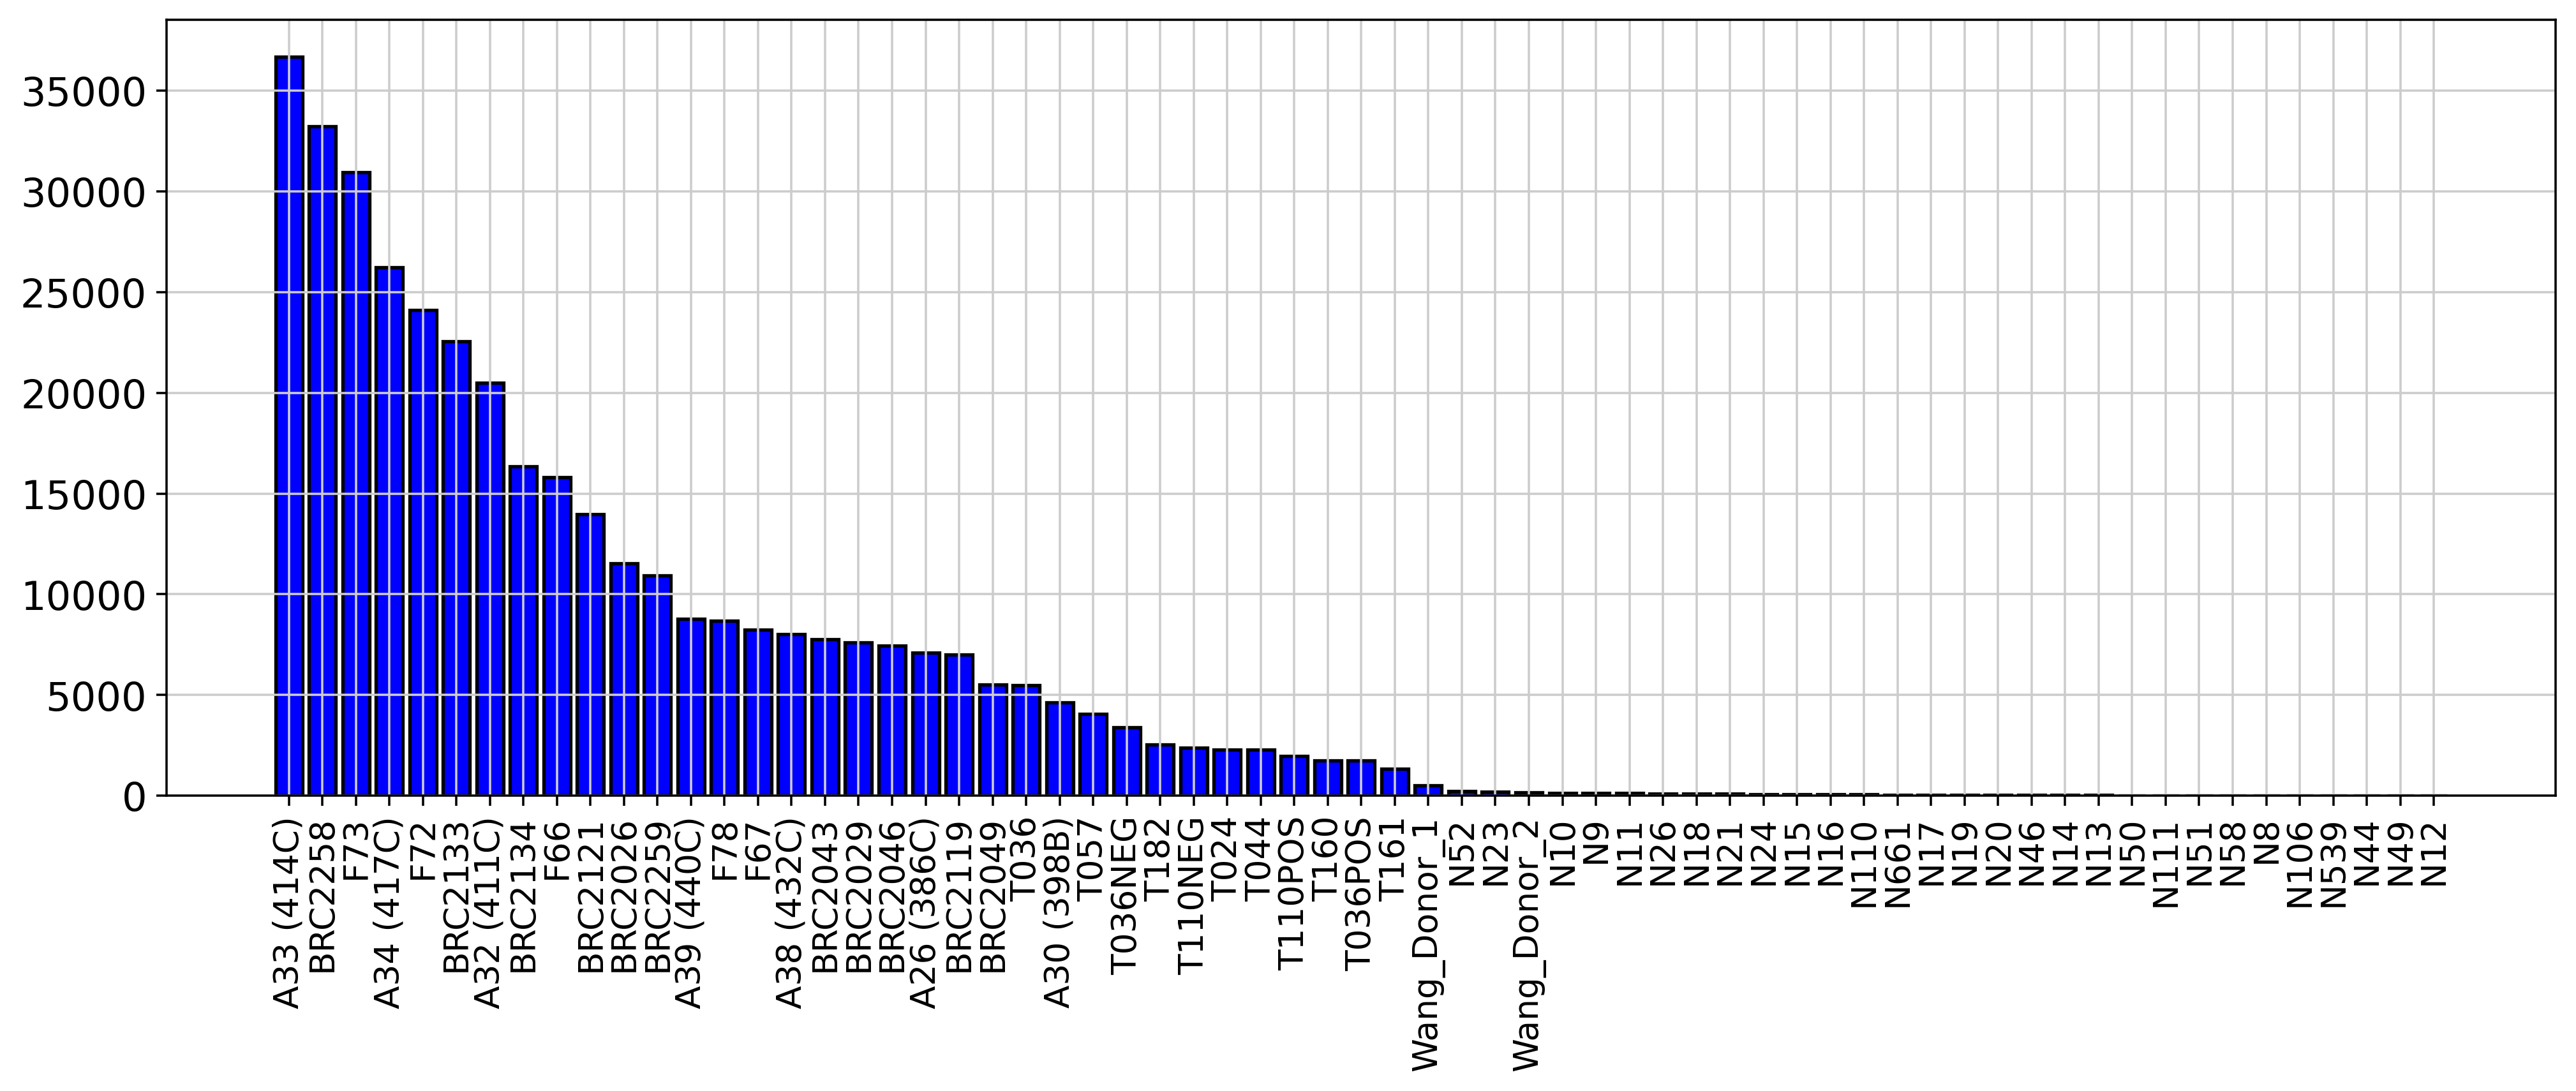

In [41]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(Reference_map_full.obs["Donor_ID"].value_counts().index, Reference_map_full.obs["Donor_ID"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
plt.xticks(rotation = 90, fontsize = 12)

In [42]:
# Rename Integrated_05 to the "Cell State" column
Reference_map_full.obs['Cell States'] = Reference_map_full.obs['Integrated_05'].copy()
del Reference_map_full.obs['Integrated_05']

In [43]:
#Change nan in cell states to Stem Cell
Reference_map_full.obs['Cell States'] = Reference_map_full.obs['Cell States'].replace('nan', 'Stem_Cells_ext')
Reference_map_full.obs['Cell States'] = Reference_map_full.obs['Cell States'].replace('Stem cells', 'Stem_Cells_GCA')

In [44]:
Reference_map_full.obs['Cell States'].value_counts()

TA                     47700
Mesoderm 2 (ZEB2+)     34731
Enterocyte             32745
Mesoderm 1 (HAND1+)    29399
IgA plasma cell        15519
                       ...  
β cells (INS+)            29
Mesothelium (PRG4+)       25
STAT1+ Naive B            23
Stromal 4 (MMP1+)         20
Germ                      11
Name: Cell States, Length: 135, dtype: int64

In [46]:
Reference_map_full.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 375293 × 40144
    obs: 'UniqueCell_ID', 'Sample_ID', 'CellType', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Gender', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts_mt', 'doublet_scores', 'predicted_doublets', 'Age_group', 'total_counts_ribo', 'Location', 'n_counts', 'percent_mito', 'percent_ribo', 'Cell States'>

In [47]:
# Write reference map to file
Reference_map_full.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/GCA_and_StemCells_initial/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad')